<a href="https://colab.research.google.com/github/purrvaja/CNN-with-Keras/blob/main/image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Dependencies and Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [2]:
# importing the data

test_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data/fashion-mnist_test.csv')
train_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data/fashion-mnist_train.csv')

###Data Preprocessing and EDA

In [3]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# converting the dataframes into numpy arrays of datatype - float32

train = np.array(train_data, dtype = 'float32')
test = np.array(test_data, dtype = 'float32')


In [5]:
# splitting into x and y (target and features)

x_train = train[:, 1:]
x_test = test[:, 1:]

y_train = train[:, 0]
y_test = test[:,0]


In [6]:
# mapping the labels to the class names

class_names = {0: 'TShirt/ Top', 1: 'Trouser', 2:'Pullover', 3: 'Dress', 4: 'Coat',
               5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8:'Bag', 9:'Ankle boot'}


<Figure size 1000x1000 with 0 Axes>

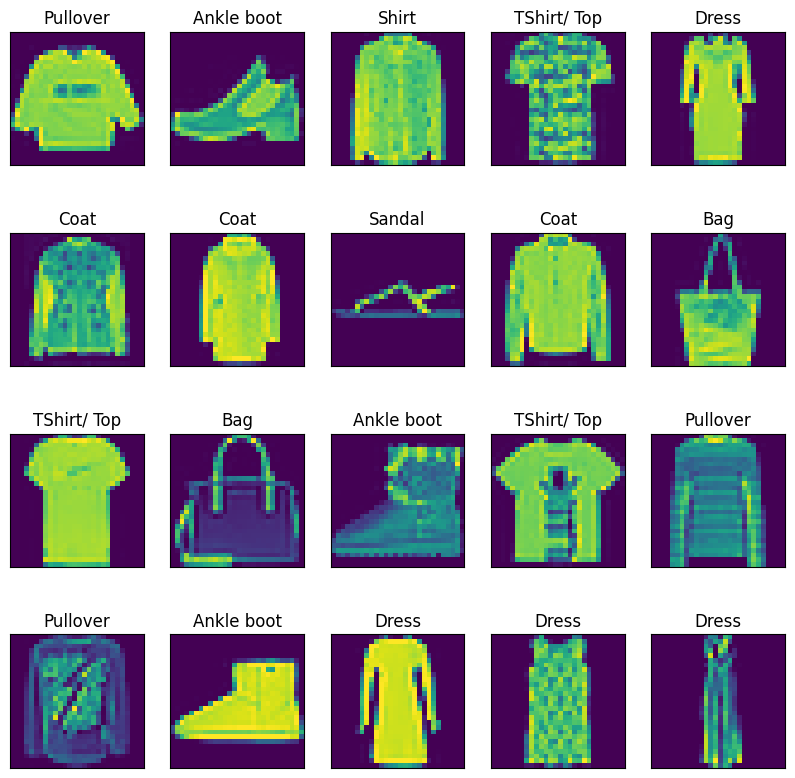

In [7]:
# visualizing the first 20 datapoints

plt.figure(figsize=(10, 10))
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names.get(label_index))


plt.show()

In [8]:
# scaling the pixel values from 0-1

x_train = x_train/255
x_test = x_test/255

In [9]:
# splitting the training set further into training data and validation data

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train,
                                                            test_size = 0.2, random_state = 124)

###Build the Model - Convolutional Neural Network (CNN) for Image Recognition

In [10]:
num_classes = 10

image_rows = 28
image_cols = 28

image_shape = (image_rows, image_cols, 1)
image_shape

(28, 28, 1)

The shape is (rows, columns, 1).

For grayscale images, the final dimension is 1, indicating a single channel for brightness levels. For color images, this would be 3, representing separate channels for red, green, and blue.

In [11]:
# reshaping the train, test and validation arrays

x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *image_shape)

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)
y_validate = y_validate.reshape(y_validate.shape[0], 1)



In [12]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(48000, 28, 28, 1)
(48000, 1)
(10000, 28, 28, 1)
(10000, 1)


####Creating the convolutional base of the model

This is a stack of Conv2D, MaxPooling2D and Dropout layers


*   Conv2D adds a convolutional layer
*   MaxPooling2D downsamples the input to fit the height and width dimensions
*   The Dropout layer is to prevent overfitting by regularizing



In [13]:
# define the model base architecture

model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = image_shape))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Dropout(0.40))



#### Adding the Output Layer

The final layer from the base is fed into a Dense layer to perform the classification.

The softmax activation function is used as this is a multiclass classification problem

In [14]:
model.add(Flatten())
model.add(Dense(64, activation = 'softmax'))
model.add(Dense(10))


In [15]:
# complete model architecture

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

#### Compile and train the model

In [16]:
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_validate, y_validate))

Epoch 1/10
1500/1500 [==============================] - 81s 53ms/step - loss: 1.6151 - accuracy: 0.5113 - val_loss: 1.2335 - val_accuracy: 0.5598
Epoch 2/10
1500/1500 [==============================] - 65s 43ms/step - loss: 1.0866 - accuracy: 0.5814 - val_loss: 0.9702 - val_accuracy: 0.5962
Epoch 3/10
1500/1500 [==============================] - 59s 39ms/step - loss: 0.9211 - accuracy: 0.6486 - val_loss: 0.8486 - val_accuracy: 0.6804
Epoch 4/10
1500/1500 [==============================] - 55s 37ms/step - loss: 0.8074 - accuracy: 0.7296 - val_loss: 0.7218 - val_accuracy: 0.7947
Epoch 5/10
1500/1500 [==============================] - 56s 38ms/step - loss: 0.6985 - accuracy: 0.7842 - val_loss: 0.6354 - val_accuracy: 0.8188
Epoch 6/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.6315 - accuracy: 0.7998 - val_loss: 0.5839 - val_accuracy: 0.8160
Epoch 7/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.5815 - accuracy: 0.8122 - val_loss: 0.5423 -

###Evaluate the Model

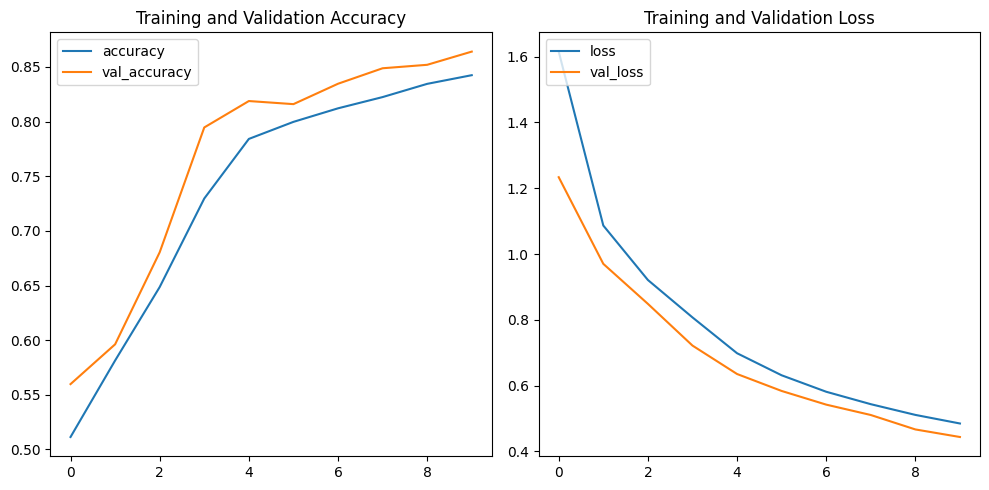

In [73]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot accuracy and validation accuracy on the first subplot
ax1.plot(history.history['accuracy'], label='accuracy')
ax1.plot(history.history['val_accuracy'], label='val_accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.legend(loc='upper left')

# Plot loss and validation loss on the second subplot
ax2.plot(history.history['loss'], label='loss')
ax2.plot(history.history['val_loss'], label='val_loss')
ax2.set_title('Training and Validation Loss')
ax2.legend(loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

###Predictions

In [35]:
# getting the accuracy and loss of the testing set
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)

313/313 - 3s - loss: 0.4372 - accuracy: 0.8673 - 3s/epoch - 11ms/step
0.8672999739646912


In [22]:
# storing the predictions

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

predicted_classes = predicted_classes.reshape(10000, 1)

313/313 [==============================] - 3s 8ms/step


In [37]:
# classification report

target_names = ["{}".format(i) for i in class_names.items()]
target_names = [item[1:-1].replace(",", ":") for item in target_names]

print(classification_report(y_test, predicted_classes, target_names = target_names))

                  precision    recall  f1-score   support

0: 'TShirt/ Top'       0.72      0.91      0.80      1000
    1: 'Trouser'       0.99      0.98      0.98      1000
   2: 'Pullover'       0.74      0.80      0.77      1000
      3: 'Dress'       0.88      0.91      0.89      1000
       4: 'Coat'       0.74      0.87      0.80      1000
     5: 'Sandal'       0.99      0.97      0.98      1000
      6: 'Shirt'       0.69      0.33      0.45      1000
    7: 'Sneaker'       0.96      0.95      0.96      1000
        8: 'Bag'       0.99      0.97      0.98      1000
 9: 'Ankle boot'       0.95      0.98      0.97      1000

        accuracy                           0.87     10000
       macro avg       0.87      0.87      0.86     10000
    weighted avg       0.87      0.87      0.86     10000



The model's performance for class 6 (Shirt) is subpar across all three metrics: precision, recall, and f1-score.

#### Plotting the incorrectly classified images

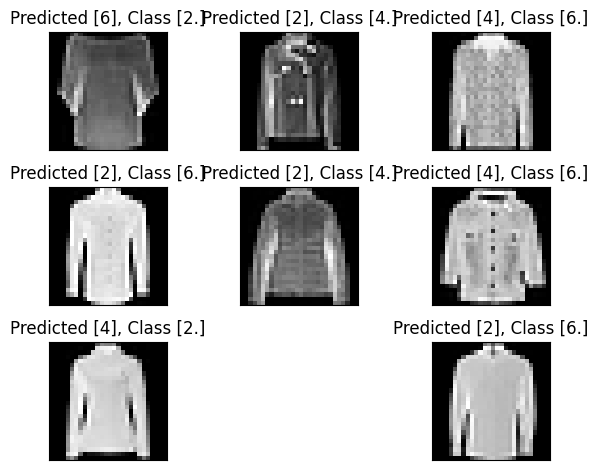

In [72]:
#get the indices to be plotted
incorrect = np.nonzero(predicted_classes!=y_test)[0]


for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

    plt.tight_layout()

plt.show()

The majority of misclassifications have happened between classes 2, 4, and 6